In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
#!pip install opencv-python

In [3]:
import cv2 as cv

In [4]:
#Il dataset con tutte le immagini si trova nella stessa cartella di questo file eseguibile.
#Nella lista all_original_images ci saranno tutte le immagini del dataset e ogni elemento sarà del tipo:
#'Nome_Classe-numero.png'
all_original_images = []
for dirname,  _, filenames in os.walk("COVID-19_Radiography_Dataset"):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            all_original_images.append(os.path.join(filename))

In [5]:
len(all_original_images)

21165

# Histogram Equalization

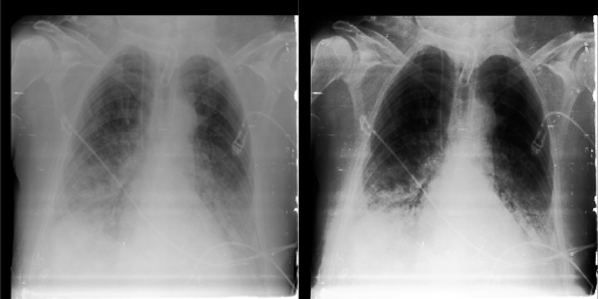

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img

#Proviamo la tecnica Histogram Equalization per migliorare il contrasto delle immagini
img = cv.imread('COVID-19_Radiography_Dataset/COVID/COVID-1.png',0)
equ = cv.equalizeHist(img)
#Confrontiamo l'immagine originale con quella ottenuta con l'HE
result_he = np.hstack((img,equ)) 
cv.imwrite('COVID-19_Radiography_Dataset/test_HE/result_he.png',result_he)
load_img('COVID-19_Radiography_Dataset/test_HE/result_he.png')

In [42]:
#Usiamo la tecnica Histogram Equalization per migliorare il contrasto di tutte le immagini del dataset
for k in all_original_images:
    image_class = k.split("-")[0]
    img = cv.imread('COVID-19_Radiography_Dataset/'+image_class+'/'+k,0)
    equ = cv.equalizeHist(img) 
    cv.imwrite('COVID-19_Radiography_Dataset/'+image_class+'/'+k,equ)

# Contrast Limited Adaptive Histogram Equalization

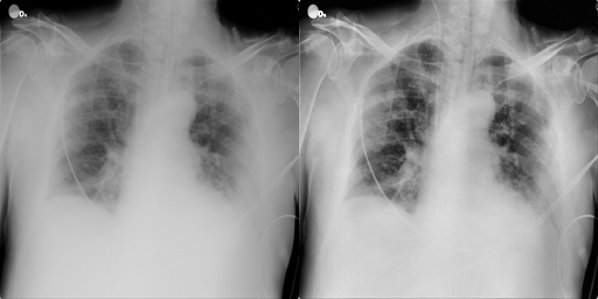

In [25]:
#Proviamo la tecnica Contrast Limited Adaptive Histogram Equalization per migliorare il contrasto delle immagini
img = cv.imread('COVID-19_Radiography_Dataset/COVID/COVID-1.png',0)
#Creiamo un oggetto clahe
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img)
result_clahe = np.hstack((img,img_clahe)) 
cv.imwrite('COVID-19_Radiography_Dataset/test_CLAHE/result_clahe.png',result_clahe)
load_img('COVID-19_Radiography_Dataset/test_CLAHE/result_clahe.png')

In [6]:
#Usiamo la tecnica Contrast Limited Adaptive Histogram Equalization per migliorare 
#il contrasto di tutte le immagini del dataset
for k in all_original_images:
    image_class = k.split("-")[0]
    img = cv.imread('COVID-19_Radiography_Dataset/'+image_class+'/'+k,0)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img)
    cv.imwrite('COVID-19_Radiography_Dataset/'+image_class+'/'+k,img_clahe)


# Image invert/complement 

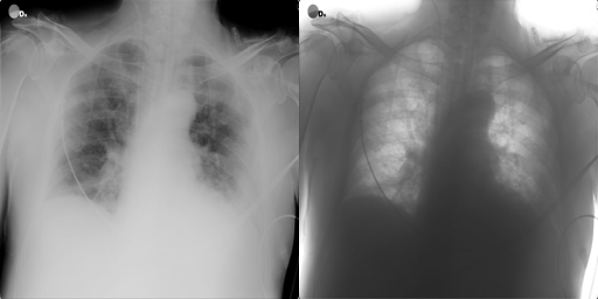

In [35]:
#Proviamo la tecnica Image invert per migliorare il contrasto delle immagini
img = cv.imread('COVID-19_Radiography_Dataset/COVID/COVID-1.png')  
img_inverted = cv.bitwise_not(img)
result_inverted = np.hstack((img,img_inverted)) 
cv.imwrite('COVID-19_Radiography_Dataset/test_INVERTED/result_inverted.png',result_inverted)
load_img('COVID-19_Radiography_Dataset/test_INVERTED/result_inverted.png')

In [4]:
#Usiamo la tecnica Image Invert per migliorare il contrasto di tutte le immagini del dataset
for k in all_original_images:
    image_class = k.split("-")[0]
    img = cv.imread('COVID-19_Radiography_Dataset/'+image_class+'/'+k,0)
    img_inverted = cv.bitwise_not(img)
    cv.imwrite('COVID-19_Radiography_Dataset/'+image_class+'/'+k,img_inverted)
